<a href="https://colab.research.google.com/github/data2450/loan-elgiblity-prediction/blob/main/loan_elgiblity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loan_ID--------------> Unique Loan ID.

Gender --------------> Male/ Female

Married --------------> Applicant married (Y/N)

Dependents ------------> Number of dependents

Education -------------> Applicant Education (Graduate/ Under Graduate)

Self_Employed ---------> Self-employed (Y/N)

ApplicantIncome -------> Applicant income

CoapplicantIncome -----> Coapplicant income

LoanAmount -----------> Loan amount in thousands

Loan_Amount_Term ------> Term of a loan in months

Credit_History --------> Credit history meets guidelines

Property_Area ---------> Urban/ Semi-Urban/ Rural

Loan_Status -----------> Loan approved (Y/N)



In [ ]:
url='https://raw.githubusercontent.com/data2450/loan-elgiblity-prediction/main/test.csv'
url1='https://raw.githubusercontent.com/data2450/loan-elgiblity-prediction/main/train.csv'

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_d=pd.read_csv(url1)
test_d=pd.read_csv(url)
train_o=pd.read_csv(url1)
test_o=pd.read_csv(url)

In [ ]:
train_d.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
print(test_d.shape)
print(train_d.shape)
train_d.info()
#we have some missing values

(367, 12)
(614, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
features_na=[features for features in train_d if train_d[features].isnull().sum()>=1]
for feature in features_na:
    print(feature, np.round(train_d[feature].isnull().mean(),4),  ' % missing values')
    print(feature, train_d[feature].isnull().sum(),  ': missing values')

Gender 0.0212  % missing values
Gender 13 : missing values
Married 0.0049  % missing values
Married 3 : missing values
Dependents 0.0244  % missing values
Dependents 15 : missing values
Self_Employed 0.0521  % missing values
Self_Employed 32 : missing values
LoanAmount 0.0358  % missing values
LoanAmount 22 : missing values
Loan_Amount_Term 0.0228  % missing values
Loan_Amount_Term 14 : missing values
Credit_History 0.0814  % missing values
Credit_History 50 : missing values


In [ ]:
test_d.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

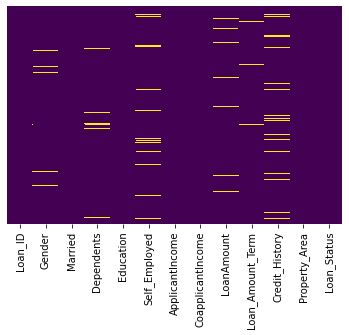

In [ ]:
sns.heatmap(train_d.isnull(),yticklabels=False,cbar=False,cmap='viridis')

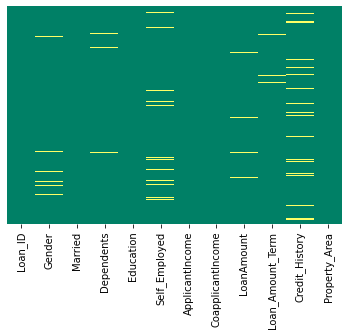

In [ ]:
sns.heatmap(test_d.isnull(),yticklabels=False,cbar=False,cmap='summer')

In [ ]:
train_d.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# EDA

## Univariate Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5d1903e780>,
      dtype=object)

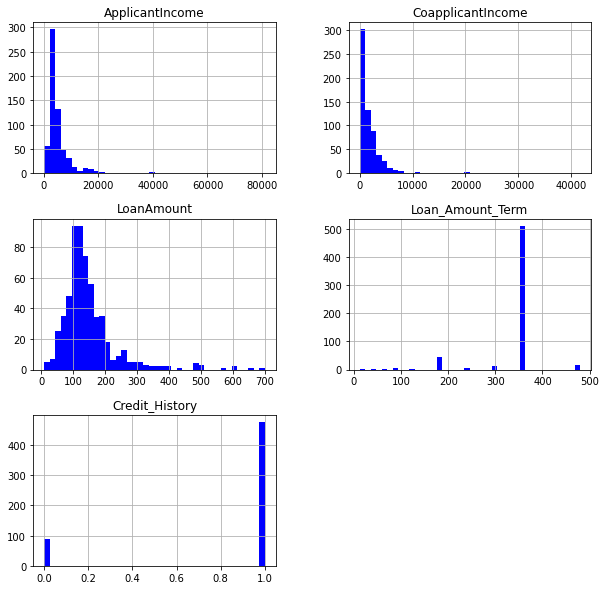

In [ ]:
train_d.hist(figsize = (10,10),color="b",bins=40,alpha=1)
#we have some skewed features

Male      489
Female    112
Name: Gender, dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


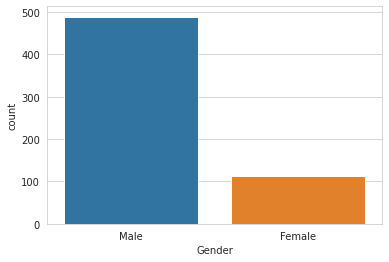

In [ ]:
print(train_d.Gender.value_counts())
sns.set_style('whitegrid')
sns.countplot('Gender', data = train_d)
#more applicants are female

In [ ]:
# target variable
train_d['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [ ]:
# percentage distribution of 'Loan_Status'
train_d['Loan_Status'].value_counts(normalize = True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


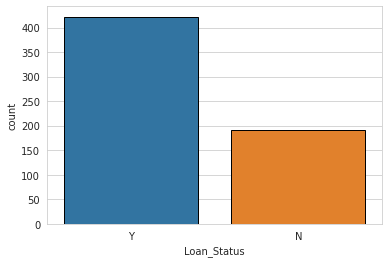

In [ ]:
sns.set_style('whitegrid')
sns.countplot('Loan_Status', data = train_d,edgecolor=(0,0,0))

In [ ]:
features_ch=[features for features in train_d if train_d[features].dtype=='object']
features_ch

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

Yes    398
No     213
Name: Married, dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


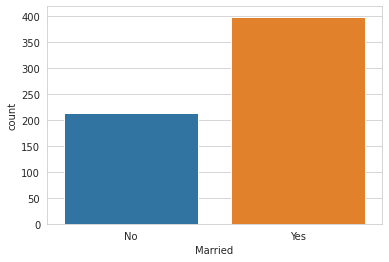

In [ ]:
#married
print(train_d.Married.value_counts())
sns.set_style('whitegrid')
sns.countplot('Married', data = train_d)

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


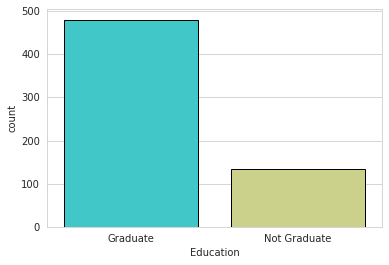

In [ ]:
#education
print(train_d.Education.value_counts())
sns.set_style('whitegrid')
sns.countplot('Education', data = train_d,palette='rainbow',edgecolor=(0,0,0))

No     500
Yes     82
Name: Self_Employed, dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


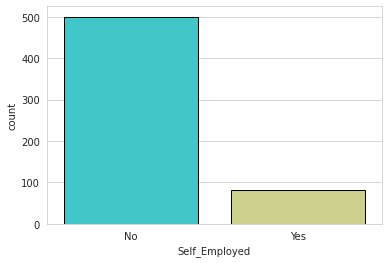

In [ ]:
#self_employed
print(train_d.Self_Employed.value_counts())
sns.set_style('whitegrid')
sns.countplot('Self_Employed', data = train_d,palette='rainbow',edgecolor=(0,0,0))

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


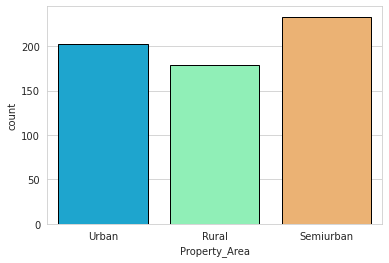

In [ ]:
print(train_d.Property_Area.value_counts())
sns.set_style('whitegrid')
sns.countplot('Property_Area', data = train_d,palette='rainbow',edgecolor=(0,0,0))


1.0    0.842199
0.0    0.157801
Name: Credit_History, dtype: float64


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


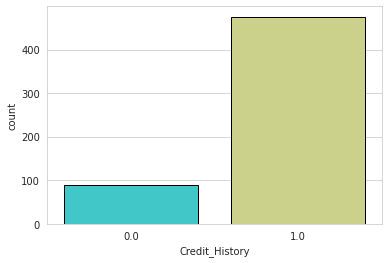

In [ ]:
print(train_d.Credit_History.value_counts(normalize=True))
sns.set_style('whitegrid')
sns.countplot('Credit_History', data = train_d,palette='rainbow',edgecolor=(0,0,0))

So from the above plot and value count analysis it can be says that

81% applicant are male in dataset.

65% appliant are married in dataset.

80% applicants are Graduate.

15% applicants are self employed.

85% applicants have credit history

## ordinal varible

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


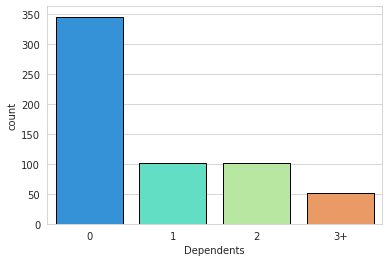

In [ ]:
#Dependents
sns.set_style('whitegrid')
sns.countplot('Dependents', data = train_d,palette='rainbow',edgecolor=(0,0,0))

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


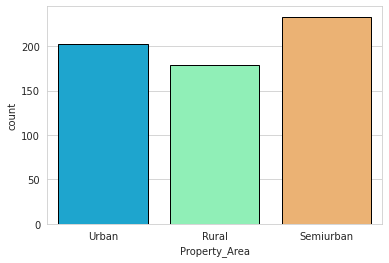

In [ ]:
#properity area
sns.set_style('whitegrid')
sns.countplot('Property_Area', data = train_d,palette='rainbow',edgecolor=(0,0,0))

From above it can be concluded that

Most of the applicant have no dependents

Majority of the applicants belong from SemiUrban region

## numerical varibles

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


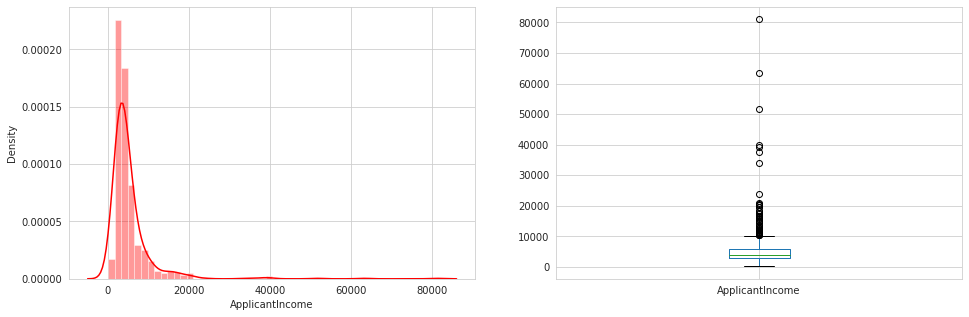

In [ ]:
#ApplicantIncome
plt.subplot(121)
sns.distplot(train_d['ApplicantIncome'],color="r");

plt.subplot(122)
train_d['ApplicantIncome'].plot.box(figsize=(16,5))

plt.show()
#the applicant income features have some outliers and its right skewed

## Coapplicant income

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


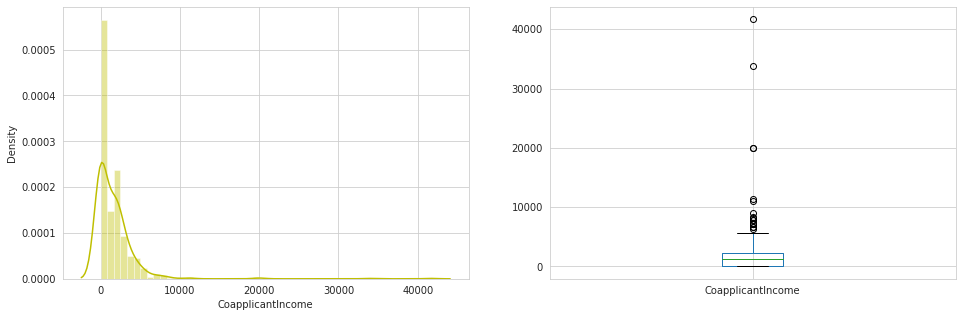

In [ ]:
plt.subplot(121)
sns.distplot(train_d['CoapplicantIncome'],color="y");

plt.subplot(122)
train_d['CoapplicantIncome'].plot.box(figsize=(16,5))

plt.show()
#this feature also has outliers and its right skewed

## Loan_Amount_Term

In [ ]:
#loan amount in months
train_d['Loan_Amount_Term'].value_counts(normalize = True)

360.0    0.853333
180.0    0.073333
480.0    0.025000
300.0    0.021667
84.0     0.006667
240.0    0.006667
120.0    0.005000
36.0     0.003333
60.0     0.003333
12.0     0.001667
Name: Loan_Amount_Term, dtype: float64

In [ ]:
train_d['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


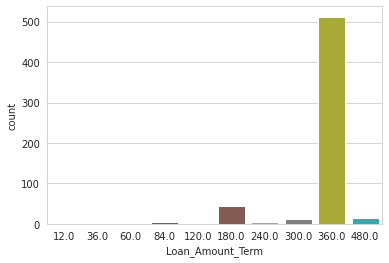

In [ ]:
sns.countplot('Loan_Amount_Term', data = train_d)

Around 86% Loan term is of 360 month

# Bivariate Analysis
Exploring variable with respect to target variable and categorical Independent variables


## Categorical Independent Variable vs Target Variable

**Gender vs Loan_Status**

Loan_Status    N    Y
Gender               
Female        37   75
Male         150  339


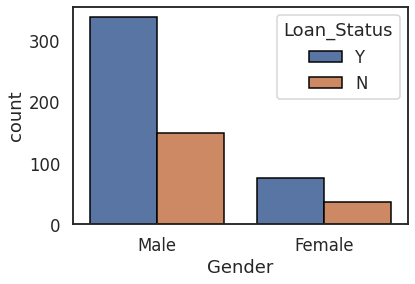

In [ ]:
print(pd.crosstab(train_d['Gender'],train_d['Loan_Status']))

sns.set(style="white", context="talk")
sns.countplot(x="Gender",hue="Loan_Status",data=train_d,edgecolor=(0,0,0))

In [ ]:
#pd.pivot_table(train_d, index = 'Gender', columns = 'Loan_Status', values = 'CoapplicantIncome' ,aggfunc ='count')

Loan_Status      N    Y
Self_Employed          
No             157  343
Yes             26   56


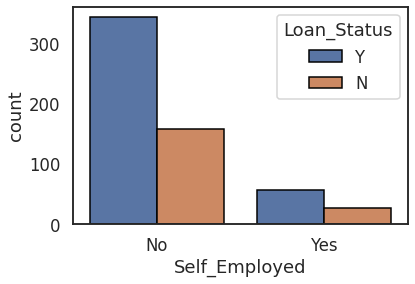

In [ ]:
print(pd.crosstab(train_d['Self_Employed'],train_d['Loan_Status']))
sns.set(style="white", context="talk")
sns.countplot(x="Self_Employed",hue="Loan_Status",data=train_d,edgecolor=(0,0,0))

Loan_Status      N    Y
Credit_History         
0.0             82    7
1.0             97  378


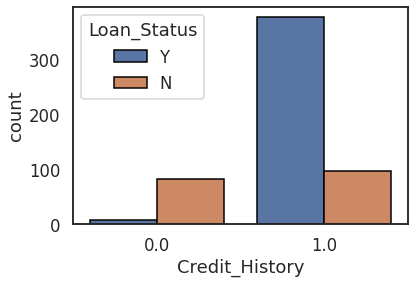

In [ ]:
print(pd.crosstab(train_d['Credit_History'],train_d['Loan_Status']))
sns.set(style="white", context="talk")
sns.countplot(x="Credit_History",hue="Loan_Status",data=train_d,edgecolor=(0,0,0))

Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82


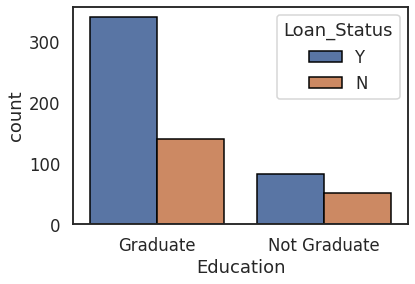

In [ ]:
print(pd.crosstab(train_d['Education'],train_d['Loan_Status']))
sns.set(style="white", context="talk")
sns.countplot(x="Education",hue="Loan_Status",data=train_d,edgecolor=(0,0,0))

Loan_Status    N    Y
Married              
No            79  134
Yes          113  285


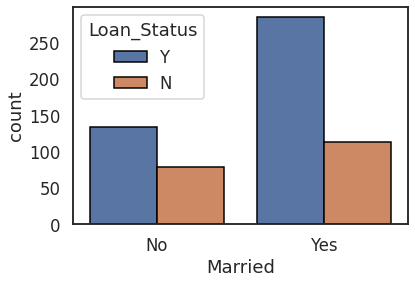

In [ ]:
print(pd.crosstab(train_d['Married'],train_d['Loan_Status']))
sns.set(style="white", context="talk")
sns.countplot(x="Married",hue="Loan_Status",data=train_d,edgecolor=(0,0,0))

Loan_Status    N    Y
Dependents           
0            107  238
1             36   66
2             25   76
3+            18   33


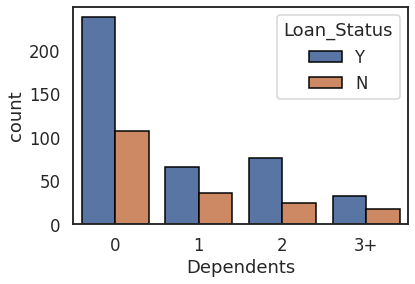

In [ ]:
print(pd.crosstab(train_d['Dependents'],train_d['Loan_Status']))
sns.set(style="white", context="talk")
sns.countplot(x="Dependents",hue="Loan_Status",data=train_d,edgecolor=(0,0,0))

Loan_Status     N    Y
Property_Area         
Rural          69  110
Semiurban      54  179
Urban          69  133


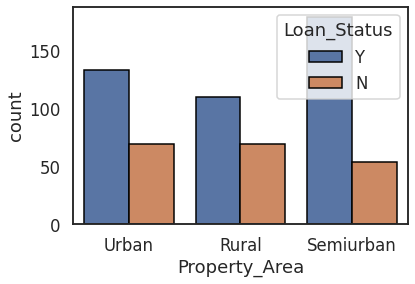

In [ ]:
print(pd.crosstab(train_d['Property_Area'],train_d['Loan_Status']))
sns.set(style="white", context="talk")
sns.countplot(x="Property_Area",hue="Loan_Status",data=train_d,edgecolor=(0,0,0))

From the above chart, it can be says that:

proportion of male and female applicants is more or less same for both approved and unapproved loans

proportion of married applicants is higher for the approved loans

distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status

proportion of loans getting approved for graduates is higher compared to non-graduates

it seems people with credit history as 1 are more likely to get their loans approved

proportion of loans getting approved in semiurban area is higher as compared to that in rural or urban areas.

# Numerical vs Target Variable

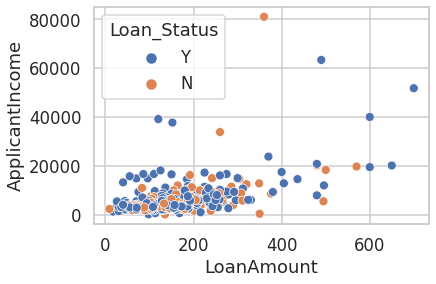

In [ ]:
sns.set_style('whitegrid')
sns.scatterplot(x="LoanAmount",y="ApplicantIncome",data=train_d,hue='Loan_Status')
#as the applicant income increses there is small probablity of getting loan

## ordinal features

In [ ]:
train_d.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
train_d.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
# Dependents
train_d['Dependents'] = train_d['Dependents'].map({"0":0,"1":1,"2":2,"3+":4})

In [ ]:
# Education
train_d['Education'] = train_d['Education'].map({"Graduate":1,"Not Graduate":0})

In [ ]:
# Loan Status
train_d['Loan_Status'] = train_d['Loan_Status'].map({"Y":1,"N":0})

In [ ]:
# Self Employed
train_d['Self_Employed'] = train_d['Self_Employed'].map({"Yes":1,"No":0})

In [ ]:
train_d['Gender'] = train_d['Gender'].map({'Male':1,'Female':0})

In [ ]:
# Property Area
train_d['Property_Area'] = train_d['Property_Area'].map({"Rural":1,"Semiurban":2,"Urban":3})

In [ ]:
train_d['Married'] = train_d['Married'].map({"Yes":1,"No":0})

In [ ]:
train_d.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,3,1
1,LP001003,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,1,0
2,LP001005,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,3,1
3,LP001006,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,3,1
4,LP001008,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,3,1


## Correlation
It is important to discover and quantify the degree to which variables in your dataset are dependent upon each other. Correlation values range between -1 and 1. There are two key components of a correlation value:

magnitude – The larger the magnitude (closer to 1 or -1), the stronger the correlation

sign – If negative, there is an inverse correlation. If positive, there is a regular correlation.


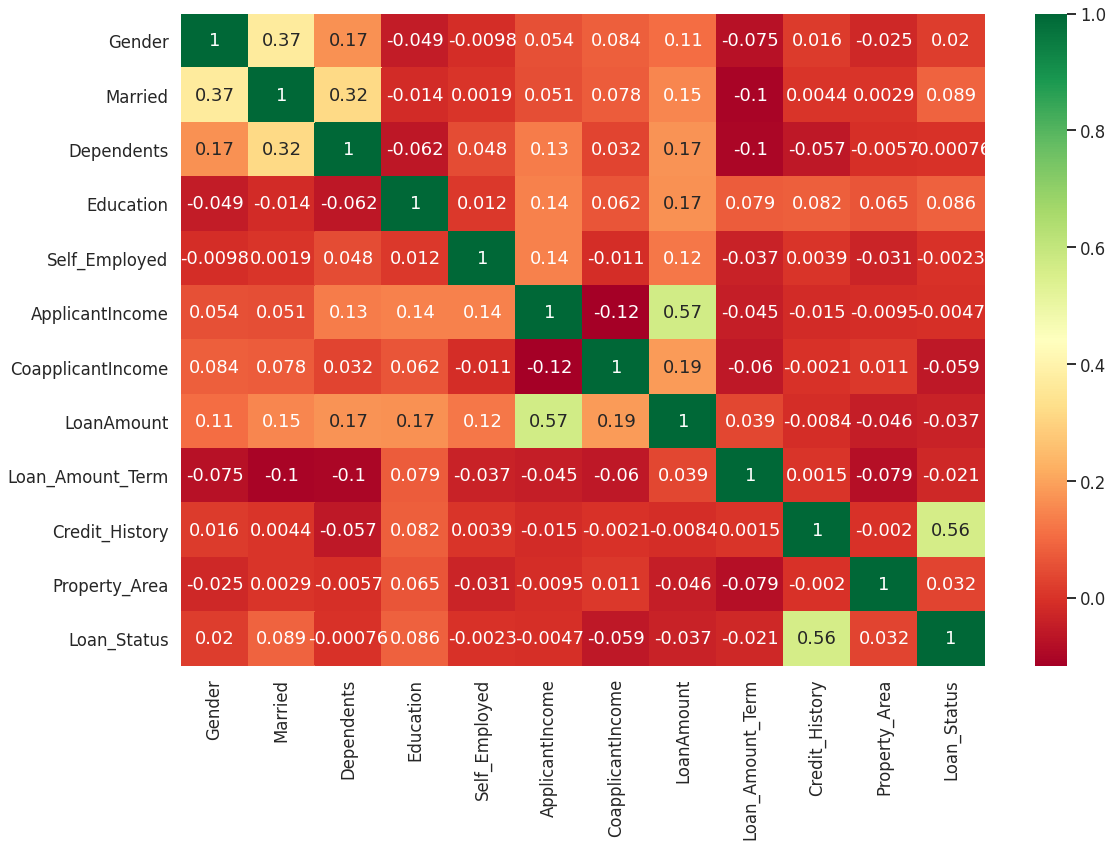

In [ ]:
plt.figure(figsize = (18,12))
sns.heatmap(train_d.corr(), annot = True, cmap = "RdYlGn")

plt.show()

Note: We see that the most correlated variables are

Gender has highest correlation with Married

Dependants has highest correlation with Married

Self Employed has highest correlation with Applicant Income

ApplicantIncome - LoanAmount with correlation coefficient of 0.57

LoanAmount is also correlated with CoapplicantIncome with correlation coefficient of 0.19.

Credit History is highly correlated with Loan Status

## data preprocessing

**missing value and outlier treatment**

In [ ]:
print(train_o.isnull().sum())
train_o.head()


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
print(test_o.isnull().sum())
test_o.head()


Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [ ]:
print(pd.crosstab(train_d['Gender'],train_d['Married']))

Married  0.0  1.0
Gender           
0.0       80   31
1.0      130  357


In [ ]:
print(pd.crosstab(train_d['Dependents'],train_d['Married']))

Married     0.0  1.0
Dependents          
0.0         171  174
1.0          23   79
2.0           8   93
4.0           7   44


In [ ]:
print(pd.crosstab(train_d['Dependents'],train_d['Gender']))

Gender      0.0  1.0
Dependents          
0.0          80  258
1.0          19   82
2.0           7   92
4.0           3   45


In [ ]:
# Missing value in Gender columns for train data
train_o.loc[(train_o['Gender'].isnull()) & (train_o['Married']== 'Yes') ,'Gender']= 'Male'
train_o.loc[(train_o['Gender'].isnull()) & (train_o['Married']== 'No') ,'Gender']= 'Female'

In [ ]:
train_o["Gender"].isnull().sum()

0

In [ ]:
# Missing value in Gender columns for test data
test_o.loc[(test_o['Gender'].isnull()) & (test_o['Married']== 'Yes') ,'Gender']= 'Male'
test_o.loc[(test_o['Gender'].isnull()) & (test_o['Married']== 'No') ,'Gender']= 'Female'

In [ ]:
# Missing value in MArried columns for train data
train_o.loc[(train_o["Married"].isnull()) & (train_o["Gender"]=="Male"),"Married"]="Yes"
train_o.loc[(train_o["Married"].isnull()) & (train_o["Gender"]=="Female"),"Married"]="No"

In [ ]:
train_o['Married'].isnull().sum()

0

## Dependent

In [ ]:
# Dependent
train_o['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [ ]:
test_o['Dependents'].value_counts()

0     200
2      59
1      58
3+     40
Name: Dependents, dtype: int64

In [ ]:
# fill zero in place of missing value
train_o['Dependents']= train_o['Dependents'].fillna('0')
test_o['Dependents']= test_o['Dependents'].fillna('0')

In [ ]:
test_o['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [ ]:
train_o['Dependents']= train_o['Dependents'].map({"0":0,"1":1,"2":2,"3+":4})
test_o['Dependents']= test_o['Dependents'].map({"0":0,"1":1,"2":2,"3+":4})

In [ ]:
# Label Encoder for dependents 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_o['Dependents']= le.fit_transform(train_o['Dependents'])
test_o['Dependents']= le.fit_transform(test_o['Dependents'])

In [ ]:
train_o.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Self employed vs Education are highly correlated missing value filled

In [ ]:
# Missing value in Self Employed columns for train data
train_o.loc[(train_o["Self_Employed"].isnull()) & (train_o["Education"]=="Graduate"),"Self_Employed"]="No"
train_o.loc[(train_o["Self_Employed"].isnull()) & (train_o["Education"]=="Not Graduate"),"Self_Employed"]="Yes"

In [ ]:
train_o['Self_Employed'].isnull().sum()

0

In [ ]:
# Missing value in Self Employed columns for test data
test_o.loc[(test_o["Self_Employed"].isnull()) & (test_o["Education"]=="Graduate"),"Self_Employed"]="No"
test_o.loc[(test_o["Self_Employed"].isnull()) & (test_o["Education"]=="Not Graduate"),"Self_Employed"]="Yes"

In [ ]:
test_o['Self_Employed'].isnull().sum()

0

In [ ]:
# check whether all the missing values are filled in the Train dataset
print(test_o.isnull().sum())
train_o.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## **Credit history and Loan Status are corelated so filled missing value using Loan Status**

In [ ]:
k=test_o[np.isnan(test_o.Credit_History)]
#print(pd.crosstab(k['Loan_Status'],k['Married']))

In [ ]:
train_o.loc[(train_o["Credit_History"].isnull()) & (train_o["Loan_Status"]=="Y"),"Credit_History"]=1.0
train_o.loc[(train_o["Credit_History"].isnull()) & (train_o["Loan_Status"]=="N"),"Credit_History"]=0.0

In [ ]:
train_o.Credit_History.isna().sum()

0

In [ ]:
test_o['Credit_History'] = test_o['Credit_History'].fillna(1.0)

## Outlier treatment and Detection

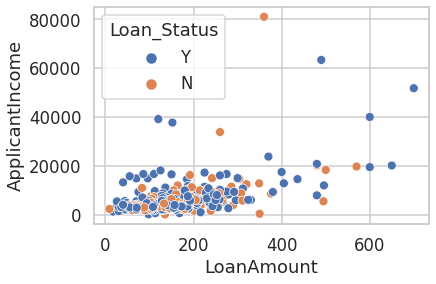

In [ ]:
sns.scatterplot(x="LoanAmount",y="ApplicantIncome",data=train_o,hue='Loan_Status')

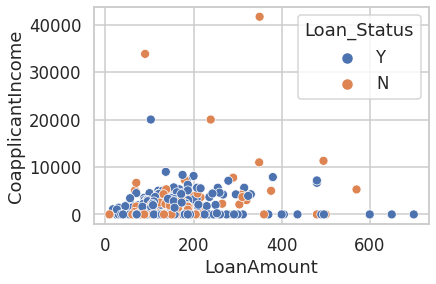

In [ ]:
sns.scatterplot(x="LoanAmount",y="CoapplicantIncome",data=train_o,hue='Loan_Status')

In [ ]:
# Outlier Detection
print(train_o.shape)
train_o['LoanAmount'].quantile([0.1,0.2,0.3]) #checking for outliers

(614, 13)


0.1     71.0
0.2     95.0
0.3    108.0
Name: LoanAmount, dtype: float64

In [ ]:
# Outlier Detection
train_o['LoanAmount'].quantile([1.0,0.99,0.98])

1.00    700.00
0.99    496.36
0.98    443.92
Name: LoanAmount, dtype: float64

In [ ]:
train_o.drop(train_o[train_o["LoanAmount"]>496.36].index,axis=0,inplace=True) #removing outliers

In [ ]:
train_o.shape

(608, 13)

## **Loan amount**

Text(0.5, 1.0, 'Test')

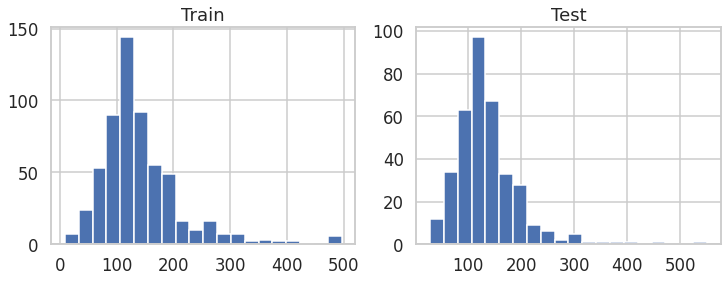

In [ ]:
# before log transformation
ax1 = plt.subplot(121)
train_o['LoanAmount'].hist(bins=20, figsize=(12,4))
ax1.set_title("Train")
ax2 = plt.subplot(122)
test_o['LoanAmount'].hist(bins=20)
ax2.set_title("Test")

In [ ]:
train_o['LoanAmount'] = train_o['LoanAmount'].fillna(train_o['LoanAmount'].median())
test_o['LoanAmount'] = test_o['LoanAmount'].fillna(test_o['LoanAmount'].median())

In [ ]:
train_o['LoanAmount'].isnull().sum(), test_o['LoanAmount'].isnull().sum()

(0, 0)

In [ ]:
# Removing skewness in LoanAmount variable by log transformation
train_o['LoanAmount'] = np.log(train_o['LoanAmount'])
test_o['LoanAmount'] = np.log(test_o['LoanAmount'])

Text(0.5, 1.0, 'Test')

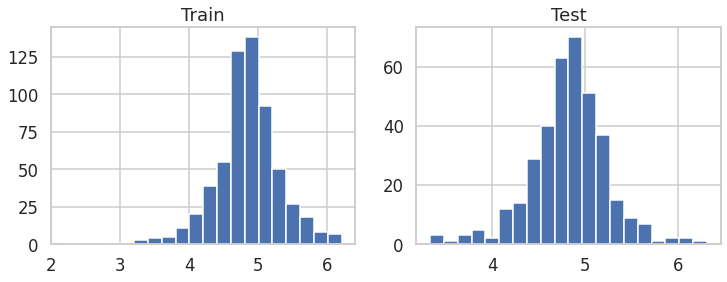

In [ ]:
# after log transformation
ax1 = plt.subplot(121)
train_o['LoanAmount'].hist(bins=20, figsize=(12,4))
ax1.set_title("Train")
ax2 = plt.subplot(122)
test_o['LoanAmount'].hist(bins=20)
ax2.set_title("Test")

In [ ]:
train_o['Loan_Amount_Term'] = train_o['Loan_Amount_Term'].fillna(360.0)
test_o['Loan_Amount_Term'] = test_o['Loan_Amount_Term'].fillna(360.0)

In [ ]:
print(test_o.isnull().sum())
train_o.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# **Feature Engineering**

In [ ]:
# combine Applicant Income and Coapplicant Income into a new variable
train_o['Total_Income'] = train_o['ApplicantIncome'] + train_o['CoapplicantIncome']
test_o['Total_Income'] = test_o['ApplicantIncome'] + test_o['CoapplicantIncome']

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Test')

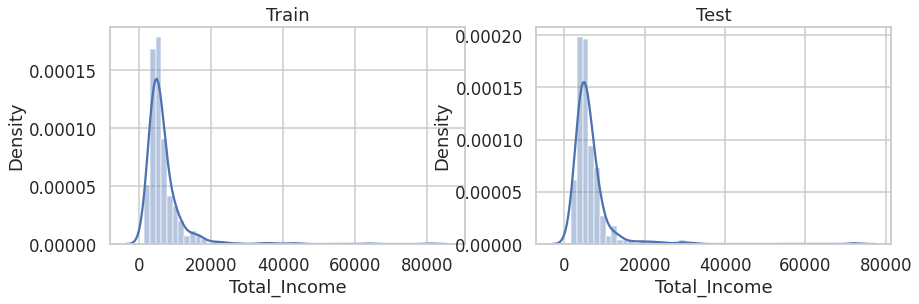

In [ ]:
# check the distribution of Total Income
# before log transformation

fig = plt.figure(figsize=(14, 4))
ax1 = plt.subplot(121)
sns.distplot(train_o['Total_Income'])
 
ax1.set_title("Train")

ax1 = plt.subplot(122)
sns.distplot(test_o['Total_Income'])
ax1.set_title("Test")

In [ ]:
# log transformation
train_o['Total_Income_log'] = np.log(train_o['Total_Income'])
test_o['Total_Income_log']  =  np.log(test_o['Total_Income'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Test')

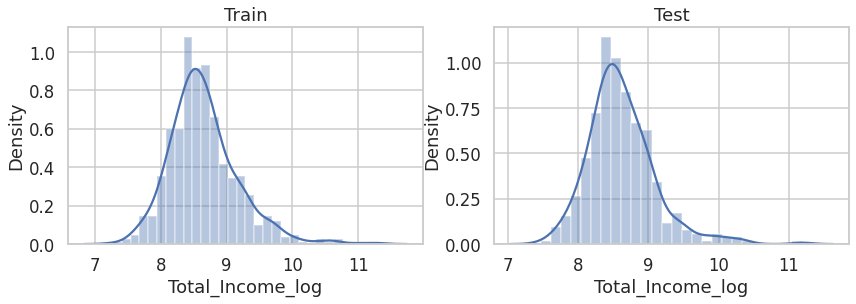

In [ ]:
# check the distribution of Total Income
# before log transformation

fig = plt.figure(figsize=(14, 4))
ax1 = plt.subplot(121)
sns.distplot(train_o['Total_Income_log'])
 
ax1.set_title("Train")

ax1 = plt.subplot(122)
sns.distplot(test_o['Total_Income_log'])
ax1.set_title("Test")

Now the distribution looks much closer to normal and effect of extreme values has been significantly subsided. Let’s create the EMI feature now. We can calculate the EMI by taking the ratio of loan amount with respect to loan amount term. It is just an approximation of actual EMI.

In [ ]:
# create EMI feature
train_o['EMI'] = (train_o['LoanAmount']*0.09*(1.09**train_o['Loan_Amount_Term']))/(1.09**(train_o['Loan_Amount_Term']-1))
test_o['EMI'] = (test_o['LoanAmount']*0.09*(1.09**test_o['Loan_Amount_Term']))/(1.09**(test_o['Loan_Amount_Term']-1))

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Test')

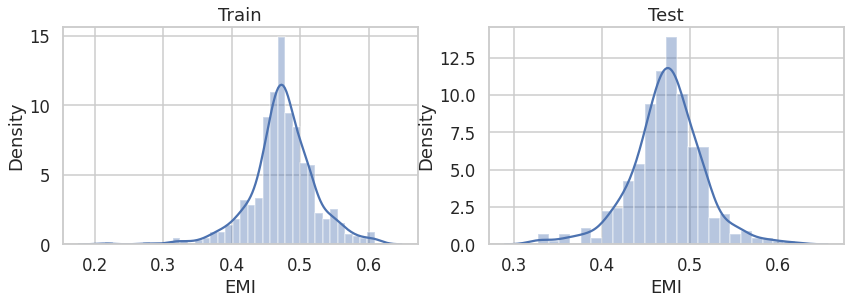

In [ ]:
# check the distribution of EMI
fig = plt.figure(figsize=(14, 4))
ax1 = plt.subplot(121)
sns.distplot(train_o['EMI'])
ax1.set_title("Train")

ax1 = plt.subplot(122)
sns.distplot(test_o['EMI'])
ax1.set_title("Test")

Let us create Balance Income feature now and check its distribution. This is the income left after the EMI has been paid.

# **Feature Selection**

In [ ]:
# drop the variables
train_o = train_o.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Total_Income','Loan_Amount_Term'], axis=1)
test_o = test_o.drop(['ApplicantIncome', 'CoapplicantIncome','LoanAmount','Total_Income','Loan_Amount_Term'], axis=1)

In [ ]:
train_o.isnull().sum()

Loan_ID             0
Gender              0
Married             0
Dependents          0
Education           0
Self_Employed       0
Credit_History      0
Property_Area       0
Loan_Status         0
Total_Income_log    0
EMI                 0
dtype: int64

In [127]:
train_o.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,Total_Income_log,EMI
0,LP001002,Male,No,0,Graduate,No,1.0,Urban,Y,8.674026,0.475215
1,LP001003,Male,Yes,1,Graduate,No,1.0,Rural,N,8.714568,0.475984
2,LP001005,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006368,0.411005
3,LP001006,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,8.505323,0.469653
4,LP001008,Male,No,0,Graduate,No,1.0,Urban,Y,8.699515,0.485473


In [129]:
#dropping loan id
train_df = train_o.drop(["Loan_ID"],axis=1)

In [130]:
train_df = pd.get_dummies(train_df,drop_first=True) # one hot encoding

In [131]:
train_df.head()

,Dependents,Credit_History,Total_Income_log,EMI,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,0,1.0,8.674026,0.475215,1,0,0,0,0,1,1
1,1,1.0,8.714568,0.475984,1,1,0,0,0,0,0
2,0,1.0,8.006368,0.411005,1,1,0,1,0,1,1
3,0,1.0,8.505323,0.469653,1,1,1,0,0,1,1
4,0,1.0,8.699515,0.485473,1,0,0,0,0,1,1


## **We are not using train test split as the dataset is too small so we'll use complete dataset for training**

In [133]:
X_train = train_df.drop(["Loan_Status_Y", "Education_Not Graduate",'Self_Employed_Yes', 'Property_Area_Urban'],axis=1)
y_train = train_df["Loan_Status_Y"]
X_test=test_o.drop(["Loan_ID"],axis=1)

In [134]:
X_test = pd.get_dummies(X_test,drop_first=True)

## **Removing "Education_Not Graduate", 'Self_Employed_Yes','Property_Area_Urban' from test data as well**

In [135]:
X_test = X_test.drop(["Education_Not Graduate", 'Self_Employed_Yes','Property_Area_Urban'],axis=1)

## **Finally lets have Final look over X_train, y_train, X_test shape**

In [136]:
X_train.shape,y_train.shape, X_test.shape

((608, 7), (608,), (367, 7))

In [137]:
X_train.head()

,Dependents,Credit_History,Total_Income_log,EMI,Gender_Male,Married_Yes,Property_Area_Semiurban
0,0,1.0,8.674026,0.475215,1,0,0
1,1,1.0,8.714568,0.475984,1,1,0
2,0,1.0,8.006368,0.411005,1,1,0
3,0,1.0,8.505323,0.469653,1,1,0
4,0,1.0,8.699515,0.485473,1,0,0


In [138]:
X_test.head()

,Dependents,Credit_History,Total_Income_log,EMI,Gender_Male,Married_Yes,Property_Area_Semiurban
0,0,1.0,8.651724,0.461117,1,1,0
1,1,1.0,8.428581,0.474439,1,1,0
2,2,1.0,8.824678,0.523612,1,1,0
3,2,1.0,8.494129,0.451767,1,1,0
4,0,1.0,8.094378,0.427393,1,0,0


# Model Selection

In [139]:
# import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# Importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

## **1. Logistic Regression**

In [140]:
from sklearn.model_selection import cross_val_score
clf = LogisticRegression()
scoring = 'accuracy'
score = cross_val_score(clf, X_train, y_train, n_jobs=1, scoring=scoring)
print(score)

[0.8442623  0.80327869 0.79508197 0.87603306 0.85123967]


In [141]:
round(np.mean(score)*100, 2)

83.4

## **2. K-Nearest Neighbour**

In [142]:
from sklearn.model_selection import KFold
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [153]:
clf = KNeighborsClassifier(n_neighbors = 15)
scoring = 'accuracy'
score = cross_val_score(clf, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.75409836 0.85245902 0.86885246 0.75409836 0.8852459  0.8852459
 0.75409836 0.78688525 0.83333333 0.81666667]


In [154]:
# kNN Score
round(np.mean(score)*100, 2)

81.91

## **3. Decision Tree**

In [155]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.73770492 0.80327869 0.78688525 0.73770492 0.75409836 0.70491803
 0.6557377  0.68852459 0.83333333 0.78333333]


In [156]:
# decision tree Score
round(np.mean(score)*100, 2)

74.86

## **4. Random Forest**

In [200]:
clf = RandomForestClassifier(n_estimators=45)
scoring = 'accuracy'
score = cross_val_score(clf, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.7704918  0.8852459  0.83606557 0.75409836 0.78688525 0.8852459
 0.75409836 0.72131148 0.91666667 0.8       ]


In [201]:
# Random Forest Score
round(np.mean(score)*100, 2)

81.1

## **5. Naive Bayes**

In [202]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.75409836 0.85245902 0.86885246 0.78688525 0.8852459  0.90163934
 0.7704918  0.78688525 0.9        0.81666667]


In [203]:
# Naive Bayes Score
round(np.mean(score)*100, 2)

83.23

## **6. Support Vector Classifier**

In [204]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.75409836 0.85245902 0.86885246 0.78688525 0.90163934 0.90163934
 0.7704918  0.78688525 0.9        0.81666667]


In [205]:
round(np.mean(score)*100,2)

83.4

In [209]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state =1)
cv = cross_val_score(xgb,X_train,y_train,cv=10)
print(cv)
print(cv.mean())

[0.80327869 0.83606557 0.7704918  0.81967213 0.80327869 0.83606557
 0.85245902 0.83606557 0.81666667 0.86666667]
0.8240710382513662


## **parameter tuning of SVC and logistic regression**

In [220]:
clf = SVC(probability = True)
scoring = 'accuracy'
score = cross_val_score(clf, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.75409836 0.85245902 0.86885246 0.78688525 0.90163934 0.90163934
 0.7704918  0.78688525 0.9        0.81666667]


In [221]:
round(np.mean(score)*100,2)

83.4

In [274]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [276]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 1}
-0.13474752334977974


In [277]:
from sklearn.model_selection import cross_val_score
clf = LogisticRegression(penalty='l2')
clf.set_params(C=1)
scoring = 'accuracy'
score = cross_val_score(clf, X_train, y_train,n_jobs=1, scoring=scoring)
print(score)

[0.8442623  0.80327869 0.79508197 0.87603306 0.85123967]


In [278]:
round(np.mean(score)*100, 2)

83.4

# Testing

In [279]:
clf = LogisticRegression()
clf.fit(X_train,y_train)
#test_data = test.drop( "Loan_ID", axis=1).copy()
prediction = clf.predict(X_test)

In [281]:
submission = pd.DataFrame({
        "Loan_ID": test_o["Loan_ID"],
        "Loan_Status": prediction
    })

In [282]:
# replacing 0 and 1 with N and Y
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

In [283]:
submission.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
